## Observations and Insights

In [1]:
#Top-level summary of the study results
#Inferences:
#1. Number of male and female mice used for conducting study is similar and shows a good balance in study by gender.
#2. Other than Inficane (which has only one outlier) no other top regimen has any outliers.
#3. For the top regimen Tumor Volume has either decreased or stayed same over time points.
#4. The weight of mouse and tumor volume has positive correlation as shown in last plot.

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combine_data = mouse_metadata.merge(study_results, on="Mouse ID", how='outer')
combine_data[(combine_data["Drug Regimen"] == "Capomulin")]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_grp = combine_data.groupby("Drug Regimen")
vol_mean = drug_grp['Tumor Volume (mm3)'].mean
vol_median = drug_grp['Tumor Volume (mm3)'].median
vol_var = drug_grp['Tumor Volume (mm3)'].var
vol_std = drug_grp['Tumor Volume (mm3)'].std
vol_sem = drug_grp['Tumor Volume (mm3)'].sem
summary_data = pd.DataFrame({"Volume Mean": vol_mean(),
                             "Volume Median": vol_median(),
                             "Volume Variance": vol_var(),
                             "Volume Std Dev": vol_std(),
                             "Volume SEM": vol_sem()})
summary_data

,Volume Mean,Volume Median,Volume Variance,Volume Std Dev,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

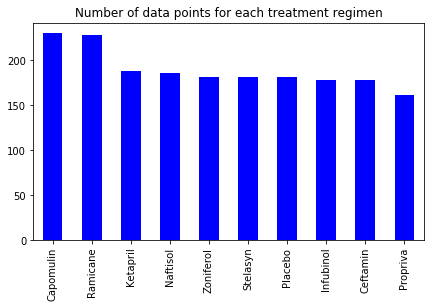

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_point = pd.DataFrame(combine_data['Drug Regimen'].value_counts())
data_point.plot(kind='bar', color="blue", legend=False, figsize = (7,4), title="Number of data points for each treatment regimen" )
plt.show()

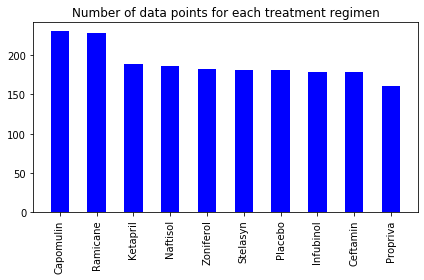

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(data_point.index, data_point['Drug Regimen'], width =0.5, color='blue')
plt.xticks(rotation='vertical')
plt.title("Number of data points for each treatment regimen")
plt.tight_layout()

## Pie plots

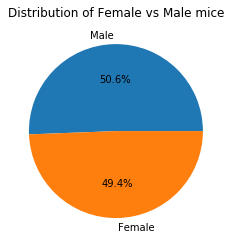

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = pd.DataFrame(combine_data['Sex'].value_counts())
#sex_count.plot(kind='pie', color="blue", legend=False )
sex_count.plot(kind='pie', y='Sex', autopct='%1.1f%%', legend=False, label="", figsize=(4, 4), title="Distribution of Female vs Male mice")
plt.show()

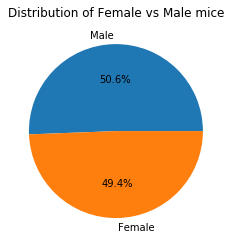

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count['Sex'], labels=sex_count.index, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male mice")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
final_vol = combine_data.groupby("Mouse ID").max()
final_vol = final_vol.reset_index()
final_vol_merge = final_vol[["Mouse ID", "Timepoint"]].merge(combine_data, on=["Mouse ID","Timepoint"], how='inner')
Capomulin_vol = final_vol_merge.loc[final_vol_merge["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
Ramicane_vol = final_vol_merge.loc[final_vol_merge["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
Infubinol_vol = final_vol_merge.loc[final_vol_merge["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
Ceftamin_vol = final_vol_merge.loc[final_vol_merge["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

#IQR and outliers for each regimen

#Capomulin
cap_quartiles = Capomulin_vol.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin outlier: {Capomulin_vol.loc[(Capomulin_vol <cap_lower_bound) | (Capomulin_vol > cap_upper_bound)]}")

#Ramicane
ram_quartiles = Ramicane_vol.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane outlier: {Ramicane_vol.loc[(Ramicane_vol <ram_lower_bound) | (Ramicane_vol > ram_upper_bound)]}")

#Infubinol
inf_quartiles = Infubinol_vol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Inficane outlier: {Infubinol_vol.loc[(Infubinol_vol <inf_lower_bound) | (Infubinol_vol > inf_upper_bound)]}")

#Ceftamin
cef_quartiles = Ceftamin_vol.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceficane outlier: {Ceftamin_vol.loc[(Ceftamin_vol <cef_lower_bound) | (Ceftamin_vol > cef_upper_bound)]}")

Capomulin outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Inficane outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceficane outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


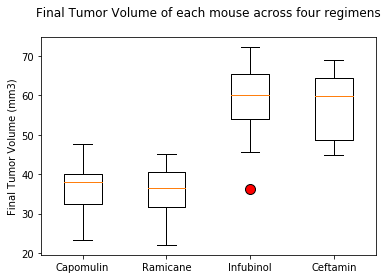

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [Capomulin_vol, Ramicane_vol, Infubinol_vol, Ceftamin_vol]
outlier_dict = dict(MarkerFaceColor='red', MarkerSize=10)
plt.boxplot(data, labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops  = outlier_dict )
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume of each mouse across four regimens\n")
plt.show()

## Line and scatter plots

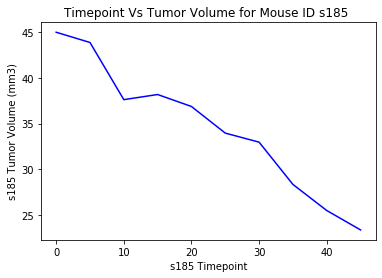

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_treated = combine_data[(combine_data["Drug Regimen"] == "Capomulin") & (combine_data["Mouse ID"] == "s185")]
mouse_treated
plt.plot(mouse_treated["Timepoint"], mouse_treated["Tumor Volume (mm3)"], color="blue", label="World Average" )
plt.xlabel("s185 Timepoint")
plt.ylabel("s185 Tumor Volume (mm3)")
plt.title("Timepoint Vs Tumor Volume for Mouse ID s185 ")
plt.show()

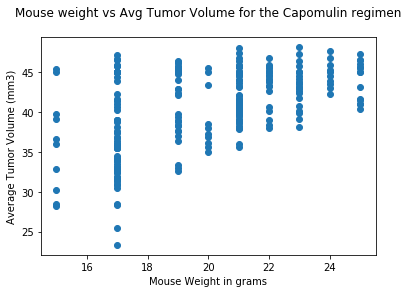

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_df = combine_data[(combine_data["Drug Regimen"] == "Capomulin")]
mouse_df_grp = mouse_df.groupby("Mouse ID").mean()
plt.scatter(mouse_df["Weight (g)"], mouse_df["Tumor Volume (mm3)"])
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse weight vs Avg Tumor Volume for the Capomulin regimen\n")
plt.show()

The correlation between both factors is 0.53


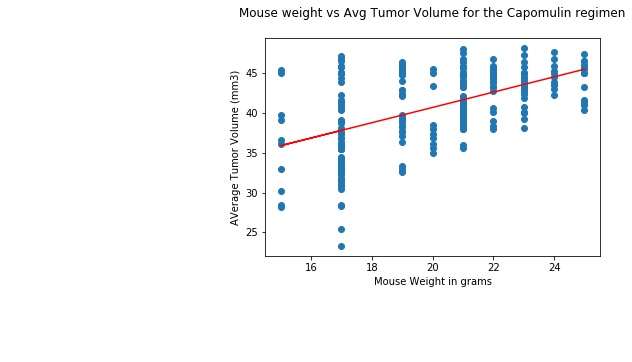

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume
#for the Capomulin regimen

correlation = st.pearsonr(mouse_df["Weight (g)"], mouse_df["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
from scipy.stats import linregress
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight in grams')
plt.ylabel('AVerage Tumor Volume (mm3)')
plt.title("Mouse weight vs Avg Tumor Volume for the Capomulin regimen\n")
plt.show()